In [8]:
from mp_api.client import MPRester
from monty.serialization import dumpfn, loadfn
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import json, os

api_key = json.load(open(os.path.join(os.path.expanduser('~'), '.mp-credentials')))['api_key']

In [ ]:
with MPRester(api_key) as mpr:
    

In [50]:
import requests

r = requests.get(f'https://api.materialsproject.org/materials/provenance/?deprecated=false&_per_page=5&_skip=0&_limit=5&_all_fields=true?api_key={api_key}')
r.content

b'{\n  "message":"No API key found in request"\n}'

In [77]:
with MPRester(api_key) as mpr:
    data = mpr.materials.summary.search(theoretical=False)

Retrieving SummaryDoc documents:   0%|          | 0/48884 [00:00<?, ?it/s]

/home/jhyang/anaconda3/envs/isyn2/lib/python3.9/site-packages/mp_api/client/core/client.py:664: UserWarning: Use the 'fields' argument to select only fields of interest to speed up data retrieval for large queries. Choose from: ['builder_meta', 'nsites', 'elements', 'nelements', 'composition', 'composition_reduced', 'formula_pretty', 'formula_anonymous', 'chemsys', 'volume', 'density', 'density_atomic', 'symmetry', 'property_name', 'material_id', 'deprecated', 'deprecation_reasons', 'last_updated', 'origins', 'warnings', 'structure', 'task_ids', 'uncorrected_energy_per_atom', 'energy_per_atom', 'formation_energy_per_atom', 'energy_above_hull', 'is_stable', 'equilibrium_reaction_energy_per_atom', 'decomposes_to', 'xas', 'grain_boundaries', 'band_gap', 'cbm', 'vbm', 'efermi', 'is_gap_direct', 'is_metal', 'es_source_calc_id', 'bandstructure', 'dos', 'dos_energy_up', 'dos_energy_down', 'is_magnetic', 'ordering', 'total_magnetization', 'total_magnetization_normalized_vol', 'total_magnetizat

In [116]:
from monty.serialization  import loadfn, dumpfn

dumpfn(data, '/home/jhyang/WORKSPACES/DATA/crystal/mp_real.json.gz')

In [136]:
mpids = [str(d.material_id) for d in data]
len(mpids)

48884

In [142]:
pdata = []
with MPRester(api_key) as mpr:
    for i in range(0, len(mpids), 3000):
        chunk = mpids[i:i+3000]
        print(i)
        pdata.extend(mpr.materials.provenance.search(chunk))

0


Retrieving ProvenanceDoc documents:   0%|          | 0/2990 [00:00<?, ?it/s]

3000


Retrieving ProvenanceDoc documents:   0%|          | 0/2982 [00:00<?, ?it/s]

6000


Retrieving ProvenanceDoc documents:   0%|          | 0/2991 [00:00<?, ?it/s]

9000


Retrieving ProvenanceDoc documents:   0%|          | 0/2990 [00:00<?, ?it/s]

12000


Retrieving ProvenanceDoc documents:   0%|          | 0/2990 [00:00<?, ?it/s]

15000


Retrieving ProvenanceDoc documents:   0%|          | 0/2986 [00:00<?, ?it/s]

18000


Retrieving ProvenanceDoc documents:   0%|          | 0/2989 [00:00<?, ?it/s]

21000


Retrieving ProvenanceDoc documents:   0%|          | 0/2984 [00:00<?, ?it/s]

24000


Retrieving ProvenanceDoc documents:   0%|          | 0/2991 [00:00<?, ?it/s]

27000


Retrieving ProvenanceDoc documents:   0%|          | 0/2984 [00:00<?, ?it/s]

30000


Retrieving ProvenanceDoc documents:   0%|          | 0/2988 [00:00<?, ?it/s]

33000


Retrieving ProvenanceDoc documents:   0%|          | 0/2995 [00:00<?, ?it/s]

36000


Retrieving ProvenanceDoc documents:   0%|          | 0/2994 [00:00<?, ?it/s]

39000


Retrieving ProvenanceDoc documents:   0%|          | 0/2982 [00:00<?, ?it/s]

42000


Retrieving ProvenanceDoc documents:   0%|          | 0/2987 [00:00<?, ?it/s]

45000


Retrieving ProvenanceDoc documents:   0%|          | 0/2992 [00:00<?, ?it/s]

48000


Retrieving ProvenanceDoc documents:   0%|          | 0/882 [00:00<?, ?it/s]

In [145]:
dumpfn(pdata, '/home/jhyang/WORKSPACES/DATA/crystal/mp_real_prov.json.gz')

In [152]:
print(pdata[0].references)

['@article{Farr1961,\n    author = "Farr, J.D. and Giorgi, A.L. and Bowman, M.G. and Money, R.K.",\n    title = "The crystal structure of actinium metal and actinium hydride",\n    journal = "Journal of Inorganic and Nuclear Chemistry",\n    year = "1961",\n    volume = "18",\n    pages = "42-57",\n    ASTM_id = "JINCAO"\n}\n', '@article{Jain2013,\nauthor = {Jain, Anubhav and Ong, Shyue Ping and Hautier, Geoffroy and Chen, Wei and Richards, William Davidson and Dacek, Stephen and Cholia, Shreyas and Gunter, Dan and Skinner, David and Ceder, Gerbrand and Persson, Kristin a.},\ndoi = {10.1063/1.4812323},\nissn = {2166532X},\njournal = {APL Materials},\nnumber = {1},\npages = {011002},\ntitle = {{The Materials Project: A materials genome approach to accelerating materials innovation}},\nurl = {http://link.aip.org/link/AMPADS/v1/i1/p011002/s1\\&Agg=doi},\nvolume = {1},\nyear = {2013}\n}\n\n@misc{MaterialsProject,\ntitle = {{Materials Project}},\nurl = {http://www.materialsproject.org}\n}']

In [178]:
import bibtexparser

dat = pdata[3]
obj = bibtexparser.loads('\n'.join(dat.references))
for entry in obj.entries:
    if 'year' not in entry.keys() or 'title' not in entry.keys():
        print(entry)
comps = str(dat.composition_reduced)

{'freeform': 'Holmberg B., Persson K.:<i>Do complex cations Ag<sub>n</sub>X(n-1)+ exist in solid silver halide compounds?</i>. Acta Crystallographica, Section A: Crystal Physics, Diffraction, Theoretical and General Crystallography<b>31</b>(1975) S65a', 'ENTRYTYPE': 'misc', 'ID': 'sd_1503220'}
{'freeform': 'Persson K., Holmberg B.:<i>The Crystal Structure of Ag<sub>2</sub>IF·H<sub>2</sub>O - A Compound Containing Ag<sub>2</sub><sup>2+</sup> Pairs</i>. Journal of Solid State Chemistry<b>42</b>(1982) 1-10', 'ENTRYTYPE': 'misc', 'ID': 'sd_1407842'}
{'url': 'http://www.materialsproject.org', 'title': '{Materials Project}', 'ENTRYTYPE': 'misc', 'ID': 'MaterialsProject'}


In [222]:
import re
data_tree = {}
year = re.compile(r'\([12]\d{3}\)')

for dat in pdata:
    chem = str(dat.composition_reduced)
    for ref in dat.references:
        if 'Materials Project' in ref or 'Inorganic Crystal Structure Database' in ref:
            continue
        if 'freeform' in ref: 
            parsed = year.findall(s)
            if len(parsed) == 0:
                continue
            y = int(parsed[0].replace(')','').replace('(',''))
            if y not in data_tree.keys():
                data_tree[y] = []
            data_tree[y].append([ref, chem])
            continue
        if 'year' not in ref:
            continue
        obj = bibtexparser.loads(ref).entries[0]
        try:
            y = int(obj['year'])
        except:
            y = int(obj['astm_id'])
        if y not in data_tree.keys():
            data_tree[y] = []
        data_tree[y].append([ref, chem])
#    for entry in obj.entries:
#        if 'title' in entry.keys() and entry['title'] in ['{Materials Project}', '{Inorganic Crystal Structure Database}']: continue
#        if 'freeform' in entry.keys(): continue
#        if 'year' not in entry.keys() or 'title' not in entry.keys():
#            print(entry)


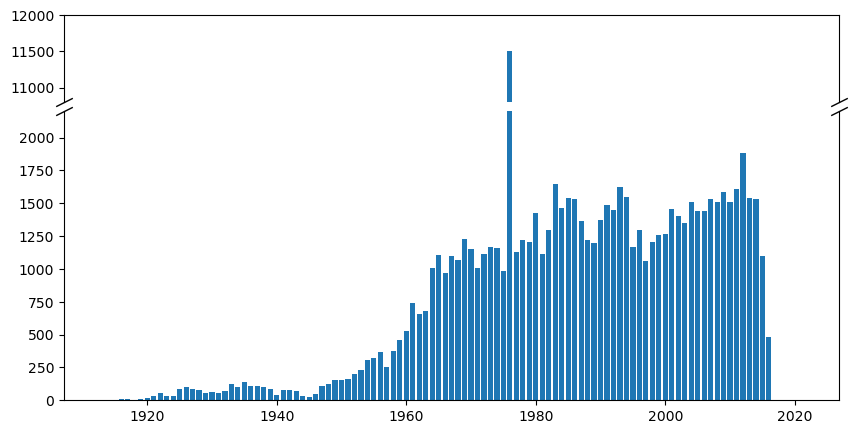

In [251]:
years_, counts_ = np.array(sorted([(y, len(l)) for y,l in data_tree.items() if y > 1000], key=lambda x: x[0])).T
f, axs = plt.subplots(2,1,figsize=(10,5), gridspec_kw={'height_ratios':[0.3, 1]})
axs[0].bar(years_, counts_)
axs[1].bar(years_, counts_)
axs[0].set_ylim([10800, 12000])
axs[1].set_ylim([0, 2200])
axs[0].spines.bottom.set_visible(False)
axs[0].set_xticks([])
axs[1].spines.top.set_visible(False)
f.subplots_adjust(hspace=0.05)
d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
axs[0].plot([0, 1], [0, 0], transform=axs[0].transAxes, **kwargs)
axs[1].plot([0, 1], [1, 1], transform=axs[1].transAxes, **kwargs)


In [231]:
counts_

array([    2,     3,     2,     9,     9,     2,    10,    14,    33,
          58,    34,    33,    85,   101,    85,    79,    56,    61,
          52,    72,   122,   103,   137,   107,   112,   100,    89,
          39,    82,    81,    69,    35,    24,    44,   110,   124,
         151,   154,   164,   202,   227,   308,   325,   371,   253,
         378,   456,   526,   739,   659,   680,  1008,  1104,   972,
        1100,  1071,  1229,  1153,  1006,  1112,  1168,  1160,   982,
       11511,  1129,  1220,  1207,  1429,  1110,  1299,  1644,  1464,
        1542,  1531,  1365,  1222,  1197,  1369,  1488,  1448,  1625,
        1547,  1168,  1295,  1064,  1207,  1260,  1269,  1454,  1405,
        1348,  1509,  1444,  1444,  1536,  1510,  1584,  1509,  1609,
        1886,  1538,  1533,  1099,   480,     3,     5])

In [203]:
data_tree